In [1]:
# Import all dependencies and the excel file and converting it to a dataframe.
import pandas as pd
import numpy as np
from IPython.display import display
%pylab inline
import seaborn as sns
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image 
import pydotplus
df = pd.read_excel("C:/Users/pelgu/Downloads/IMA2 (1).xlsx")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Converting Atrition 'Yes' to 1 and 'No' to 0
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)
df.astype({"Attrition": int})



,ID,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,StartDate
0,1,41,1,Sales,1 miles,College,Life Sciences,Medium,Very High,Single,"£5,993.00",8,Bad,2015-11-23
1,2,49,0,Research & Development,8 miles,Below College,Life Sciences,High,Medium,Married,"£5,130.00",1,Better,2011-10-10
2,3,37,1,Research & Development,2 miles,College,Other,Very High,High,Single,"£2,090.00",6,Better,2021-08-19
3,4,33,0,Research & Development,3 miles,Masters,Life Sciences,Very High,High,Married,"£2,909.00",1,Better,2013-09-14
4,5,27,0,Research & Development,2 miles,Below College,Medical,Low,Medium,Married,"£3,468.00",9,Better,2019-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,0,Research & Development,23 miles,College,Medical,High,Very High,Married,"£2,571.00",4,Better,2016-06-24
1466,1467,39,0,Research & Development,6 miles,Below College,Medical,Very High,Low,Married,"£9,991.00",4,Better,2014-08-24
1467,1468,27,0,Research & Development,4 miles,Bachelors,Life Sciences,Medium,Medium,Married,"£6,142.00",1,Better,2015-04-25
1468,1469,49,0,Sales,2 miles,Bachelors,Medical,Very High,Medium,Married,"£5,390.00",2,Good,2012-05-13


In [3]:
# Transform StartDate to days since started working at the company, also from datetime to int
date = pd.to_datetime('today') # To fix the current day through the entire loop
df['currentDate'] = date - df['StartDate']
df['daysSinceEnter'] = df['currentDate'] / np.timedelta64(1, "D")

df['daysSinceEnter'] = df['daysSinceEnter'].round().astype('Int64')
df['daysSinceEnter']

df = df.drop(columns=['StartDate', 'currentDate'])

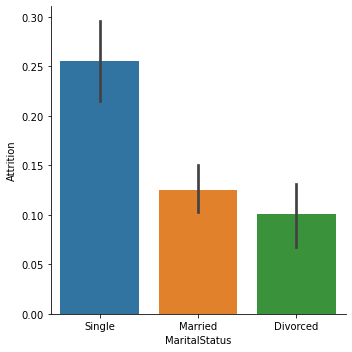

In [4]:
# Plot Marital Status vs Attrition chart
sns.catplot(x = 'MaritalStatus', y='Attrition', kind = 'bar', data=df)

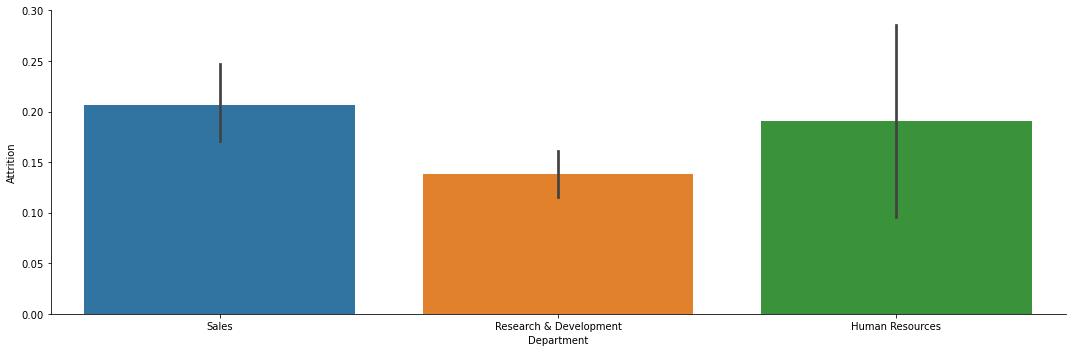

In [5]:
# Plot Department vs Attrition chart
sns.catplot(x = 'Department', y='Attrition', kind = 'bar', data=df, aspect = 3)

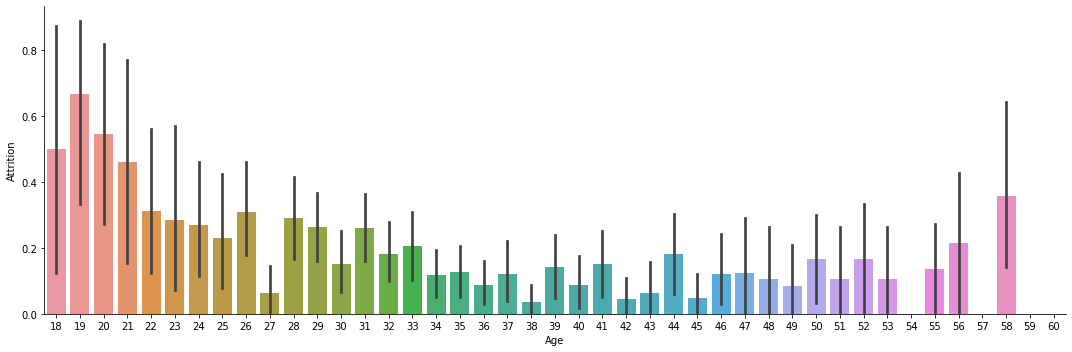

In [6]:
# Plot Age vs Attrition chart
sns.catplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)

In [7]:
# DistanceFromHome: Get rid of the "miles" tag, and converting the column type from object to interger
DistanceFromHome = df['DistanceFromHome'].str.split(" ").str.get(0)
df['DistanceFromHome'] = DistanceFromHome.astype(str).astype(int)

In [8]:
#MonthlyIncome: remove currency sign and space
df['MonthlyIncome'] = df['MonthlyIncome'].str.replace('£', '', regex=True)
df['MonthlyIncome'] = df['MonthlyIncome'].str.replace(',', '', regex=True)
df['MonthlyIncome'] = df['MonthlyIncome'].str.slice(start=0, stop=-3)

df['MonthlyIncome'] = df['MonthlyIncome'].astype(int)

In [9]:
# Get Dummy Variables for different Departments
df = pd.get_dummies(df, columns=["Education"], prefix=["Education_"]) # Get Dummy Variables for different Education Level
df = pd.get_dummies(df, columns=["Department"], prefix=["Department_"]) # Get Dummy Variables for different Departments
df = pd.get_dummies(df, columns=["EducationField"], prefix=["eField_"]) # Get Dummy Variables for different Education Field
df = pd.get_dummies(df, columns=["MaritalStatus"], prefix=["M_Status_"]) # Get Dummy Variables for different Marital Status


In [10]:
# Converting text classes into interval for the satisfaction level features
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(['Low', 'Medium', 'High', 'Very High'], [1, 2, 3, 4])
df['JobSatisfaction'] = df['JobSatisfaction'].replace(['Low', 'Medium', 'High', 'Very High'], [1, 2, 3, 4])
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(['Bad', 'Good', 'Better', 'Best'], [1, 2, 3, 4])


In [11]:
df

,ID,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,daysSinceEnter,...,Department__Sales,eField__Human Resources,eField__Life Sciences,eField__Marketing,eField__Medical,eField__Other,eField__Technical Degree,M_Status__Divorced,M_Status__Married,M_Status__Single
0,1,41,1,1,2,4,5993,8,1,2252,...,1,0,1,0,0,0,0,0,0,1
1,2,49,0,8,3,2,5130,1,3,3757,...,0,0,1,0,0,0,0,0,1,0
2,3,37,1,2,4,3,2090,6,3,156,...,0,0,0,0,0,1,0,0,0,1
3,4,33,0,3,4,3,2909,1,3,3052,...,0,0,1,0,0,0,0,0,1,0
4,5,27,0,2,1,2,3468,9,3,1004,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,0,23,3,4,2571,4,3,2038,...,0,0,0,0,1,0,0,0,1,0
1466,1467,39,0,6,4,1,9991,4,3,2708,...,0,0,0,0,1,0,0,0,1,0
1467,1468,27,0,4,2,2,6142,1,3,2464,...,0,0,1,0,0,0,0,0,1,0
1468,1469,49,0,2,4,2,5390,2,2,3541,...,1,0,0,0,1,0,0,0,1,0


In [12]:
# Separate target values
y = df['Attrition']

In [13]:
# Separate variables and remove ID column
X = df.drop(['Attrition','ID'],axis=1)
df = df.drop(['ID'],axis=1)
df

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,daysSinceEnter,Education__Bachelors,...,Department__Sales,eField__Human Resources,eField__Life Sciences,eField__Marketing,eField__Medical,eField__Other,eField__Technical Degree,M_Status__Divorced,M_Status__Married,M_Status__Single
0,41,1,1,2,4,5993,8,1,2252,0,...,1,0,1,0,0,0,0,0,0,1
1,49,0,8,3,2,5130,1,3,3757,0,...,0,0,1,0,0,0,0,0,1,0
2,37,1,2,4,3,2090,6,3,156,0,...,0,0,0,0,0,1,0,0,0,1
3,33,0,3,4,3,2909,1,3,3052,0,...,0,0,1,0,0,0,0,0,1,0
4,27,0,2,1,2,3468,9,3,1004,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,3,4,2571,4,3,2038,0,...,0,0,0,0,1,0,0,0,1,0
1466,39,0,6,4,1,9991,4,3,2708,0,...,0,0,0,0,1,0,0,0,1,0
1467,27,0,4,2,2,6142,1,3,2464,1,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,4,2,5390,2,2,3541,1,...,1,0,0,0,1,0,0,0,1,0


C:\Users\pelgu\AppData\Local\Temp/ipykernel_14720/2164568293.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

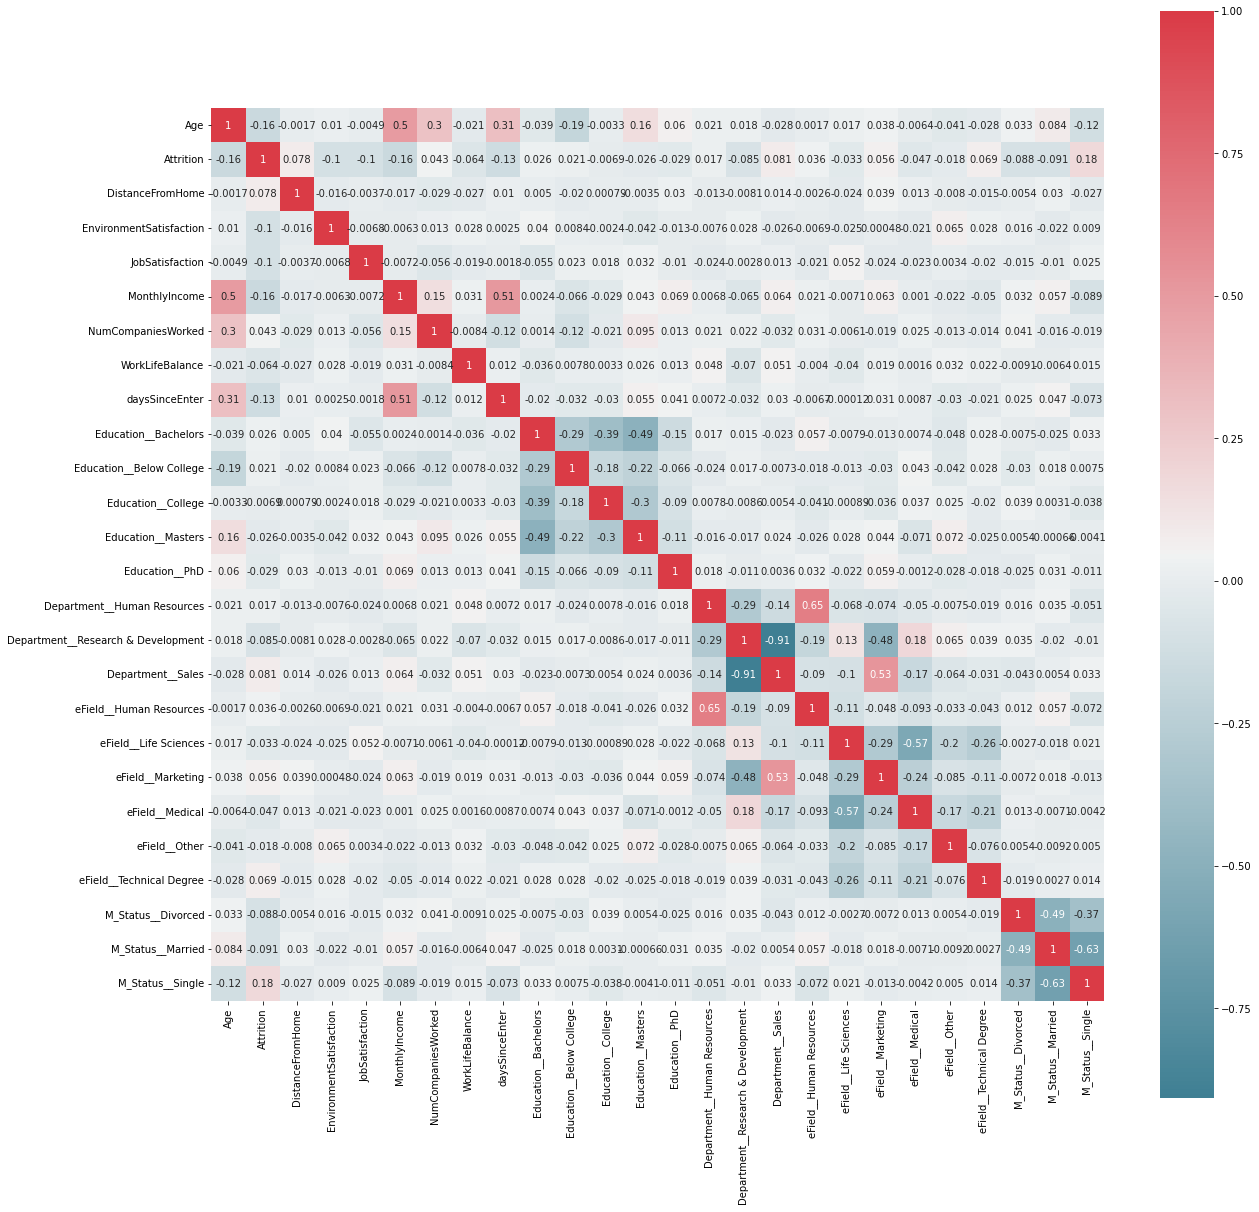

In [14]:
#Plot correlation matrix between variables

f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

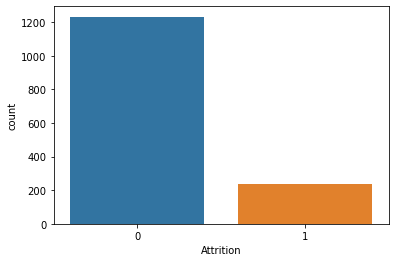

In [15]:
# Plot attrition frequency
sns.countplot(x='Attrition', data=df)

In [16]:
#Import scaler to normalize data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df = scaler.fit_transform(df)

In [17]:
#Convert scaled data back to dataframe
df = pd.DataFrame(df,columns = ['Age','Attrition','DistanceFromHome','EnvironmentSatisfaction','JobSatisfaction',
                                        'MonthlyIncome','NumCompaniesWorked','WorkLifeBalance','daysSinceEnter','Department__Human Resources',
                                        'Department__Research & Development','Department__Sales','Education__Bachelors','Education__Below College',
                                        'Education__College','Education__Masters','Education__PhD','eField__Human Resources','eField__Life Sciences',
                                        'eField__Marketing','eField__Medical','eField__Other','eField__Technical Degree','M_Status__Divorced',
                                        'M_Status__Married','M_Status__Single'])

In [18]:
#Split train and test date
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
#Print split datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 25)
(294, 25)
(1176,)
(294,)


In [22]:
#Import models for prediction and set hyperparameters
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(
 n_estimators= 100), sk.naive_bayes.GaussianNB(),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier(),sk.ensemble.AdaBoostClassifier(),
        QuadraticDiscriminantAnalysis(),MLPClassifier(),SVC()]

In [23]:
#Run all models at the same time for recall metric
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,y,cv=kf,n_jobs=-1,scoring='recall').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.3107855867379356
RandomForestClassifier() 0.1427148198416202
GaussianNB() 0.32136111801780126
LogisticRegression(n_jobs=-1) 0.039872466565157375
DecisionTreeClassifier() 0.32433531100747415
AdaBoostClassifier() 0.22585109958915317
QuadraticDiscriminantAnalysis() 0.5829913950185858
MLPClassifier() 0.11275555108507054
SVC() 0.0
***********************************************
Best is... QuadraticDiscriminantAnalysis() 0.5829913950185858


In [24]:
#Run all models at the same time for precision metric
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,y,cv=kf,n_jobs=-1,scoring='precision').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.2713161446396741
RandomForestClassifier() 0.6158333333333335
GaussianNB() 0.3923493073722775
LogisticRegression(n_jobs=-1) 0.31666666666666665
DecisionTreeClassifier() 0.2620071015135338
AdaBoostClassifier() 0.5279220779220779
QuadraticDiscriminantAnalysis() 0.1879944363046899
MLPClassifier() 0.4011272531611515
SVC() 0.0
***********************************************
Best is... RandomForestClassifier() 0.6158333333333335


In [25]:
#Run all models at the same time for F1 score
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
maxAUC = -1
bestCL = ""
for cl in clfs:
    auc = sk.model_selection.cross_val_score(cl,X,y,cv=kf,n_jobs=-1,scoring='f1').mean()
    print (str(cl) + ' ' + str(auc))
    if auc > maxAUC:
        bestCL = cl
        maxAUC = auc
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxAUC))

DecisionTreeClassifier() 0.2908633739325346
RandomForestClassifier() 0.20814124247845175
GaussianNB() 0.3468391496327009
LogisticRegression(n_jobs=-1) 0.070494695236114
DecisionTreeClassifier() 0.28065420933213747
AdaBoostClassifier() 0.31441252970959177
QuadraticDiscriminantAnalysis() 0.2727669059964139
MLPClassifier() 0.12206208618007433
SVC() 0.0
***********************************************
Best is... GaussianNB() 0.3468391496327009
